<center><span style="font-size:24px">UE3 _ Statistiques - TCeau</span></center>

_Importation des packages nécessaires_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols

<span style="font-size:18px">PREPARATION DU JEU DE DONNEES</span>

_Importation des différents jeux de données et vue d'ensemble de leur structure_

In [2]:
# Importation avec le bon encodage du premier fichier
effec1=pd.read_csv(r"\effec1.quest.compil.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
effec1.head()

,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,Certif.self.sat,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,encad.diffic,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin
Student_ID,,,,,,,,,,,,,,,,,,,,,
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19178,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,TH,TH,Cadres et professions intellectuelles,Moins de deux heures
1086,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,TH,TH,"Artisans, commerçants, chefs d'entreprise",Moins de deux heures
1948,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,TH,TH,Employés,Moins de deux heures
16209,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,B,B,Autre,Moins de deux heures


In [3]:
# Importation avec le bon encodage du deuxième fichier
effec2=pd.read_csv(r"\effec2.quest.compil.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
effec2.head()

,Current.Score,Section,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin,EMLyon.et
Student_ID,,,,,,,,,,,,,,,,,,,,,
32360,NaN,"Laboratoire, Effectuation #2",une femme,1967,France,Bac+5 (Master ou équivalent),"Sciences humaines (histoire\, archéologie\, ph...",Cadres et professions intellectuelles,par un ami ou une connaissance,"J ai déjÃ créé plusieurs entreprises,J'accom...",...,Très facile,De 1 à 2 heures,"Oui\, j'ai soumis un projet en tant que Porteu...",Satisfaisante,5,TH,TH,Cadres et professions intellectuelles,Moins de deux heures,0.0
27582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27808,NaN,Effectuation #2,un homme,1986,Haïti,Bac+3 (Licence ou équivalent),Management/Gestion d entreprise,En recherche d'emploi,autre,Je suis en train de créer mon entreprise (phas...,...,Moyen,Plus de 8 heures,"Oui\, je suis devenu Coach sur au moins un pro...",Très satisfaisante,5,B,B,En recherche d'emploi,Entre quatre et six heures,0.0
27532,NaN,"Laboratoire, Effectuation #2",un homme,1975,France,Bac ou équivalent,Droit,Cadres et professions intellectuelles,par un ami ou une connaissance,J ai un projet de création d entreprise (pha...,...,Facile,De 2 à 4 heures,"Oui\, j'ai soumis un projet en tant que Porteu...",Très satisfaisante,2,TH,TH,Cadres et professions intellectuelles,Entre deux et quatre heures,0.0
17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Importation avec le bon encodage du troisième fichier
effec3=pd.read_csv(r"\effec3.quest.compil.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
effec3.head()

,Certif.bin,Section,Gender,birth.year,Country,Diploma,EMLYON.et,Formation,CSP,How.heard,...,Incitation,Temps.Dispo,Exp.MOOC,Completion.proba,EMLyon,Country_HDI,Country_HDI.fin,age,CSP.fin,Temps.dispo.fin
Student_ID,,,,,,,,,,,,,,,,,,,,,
68029.0,1.0,MOOC Effectuation #3,un homme,1982.0,France,Bac+5 (Master ou équivalent),Non,"Mathématiques\, informatique","Artisans, commerÃ§ants, chefs d'entreprise",par une communication de l'EMLYON,...,1.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5.0,Non,TH,TH,31.0,"Artisans, commerÃ§ants, chefs d'entreprise",Entre deux et quatre heures
66198.0,1.0,"Laboratoire, Laboratoire Effectuation #3, MOOC...",un homme,1994.0,Maroc,"Bac+2 (Deug, IUT, BTS ou équivalent)",Non,"Sciences sociales (économie\, sciences politiq...",Etudiants,"par mon milieu universitaire (Professeur, etc)",...,4.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5.0,Non,H,H&M,19.0,Etudiants,Entre deux et quatre heures
68052.0,1.0,MOOC Effectuation #3,un homme,1988.0,Maroc,Bac+5 (Master ou équivalent),Oui,"Mathématiques\, informatique",Cadres et professions intellectuelles,par un ami ou une connaissance,...,4.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",4.0,Oui,H,H&M,25.0,Cadres et professions intellectuelles,Entre deux et quatre heures
14161.0,1.0,"Laboratoire, MOOC Effectuation #3",un homme,1984.0,Niger,Bac+5 (Master ou équivalent),Non,Ingénierie et technologies,Employés,par mon milieu professionnel (collègue),...,NaN,Entre une et deux heures,"Oui, dont certains intégralement",3.0,Non,B,B,29.0,Employés,Moins de deux heures
64444.0,1.0,"MOOC Effectuation #3, Laboratoire",un homme,1989.0,Côte d'Ivoire,"Bac+2 (Deug, IUT, BTS ou équivalent)",Non,Management/Gestion d'entreprise,Cadres et professions intellectuelles,par un article ou un blog sur Internet,...,5.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5.0,Non,B,B,24.0,Cadres et professions intellectuelles,Entre deux et quatre heures


In [5]:
# Importation avec le bon encodage du premier fichier de résultats
usage1=pd.read_csv(r"\usages.effec1.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
usage1.head()

,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,Quizz.3.bin,...,Post.forum.4,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz
Student_ID,,,,,,,,,,,,,,,,,,,,,
28,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,1,0
36,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
45,NaN,0,NaN,0,16.0,1,20.0,1,18.0,1,...,0,0,1,1,0,0,1,1,34,5
83,NaN,0,60.0,1,13.0,1,20.0,1,18.0,1,...,0,0,1,0,0,0,1,0,29,5
84,NaN,0,NaN,0,18.0,1,20.0,1,NaN,0,...,0,0,0,0,0,0,0,0,23,2


In [6]:
# Importation avec le bon encodage du deuxième fichier de résultats
usage2=pd.read_csv(r"\usages.effec2.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
usage2.head()

,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,Quizz.3.bin,...,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice
Student_ID,,,,,,,,,,,,,,,,,,,,,
15,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,1,0,0,0,0,0,3,0,0
26,NaN,0,NaN,0,20.0,1,NaN,0,NaN,0,...,0,0,0,0,0,0,0,3,1,0
151,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,0,NaN,0,17.1,1,16.333333,1,NaN,0,...,0,0,0,0,0,0,0,14,2,0
263,NaN,0,NaN,0,14.6,1,11.000000,1,NaN,0,...,0,0,0,0,0,0,0,7,2,0


In [7]:
# Importation avec le bon encodage du troisième fichier de résultats
usage3=pd.read_csv(r"\usages.effec3.csv",
                   header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
usage3.head()

,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,Quizz.3.bin,...,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours
Student_ID,,,,,,,,,,,,,,,,,,,,,
15,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,2,0,0,0,0
34,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
88,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,2,0,0,0,0
95,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,2,0,0,0,0
115,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Importation du fichier HDI
hdi=pd.read_csv(r"\countries.hdi.csv",
                header=None, encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
hdi.head()

,0,1,2
0,Norvège,TH,1.0
1,Australie,TH,2.0
2,Etats-Unis d'Amérique,TH,3.0
3,Pays-Bas,TH,4.0
4,Allemagne,TH,5.0


_Merge entre chacune des trois itérations_

In [9]:
# Itération 1
iter1 = effec1.merge(usage1, left_index=True, right_index=True)
iter1 = iter1.assign(iteration=1)

# Itération 2
iter2 = effec2.merge(usage2, left_index=True, right_index=True)
iter2 = iter2.assign(iteration=2)

# Itération 3
iter3 = effec3.merge(usage3, left_index=True, right_index=True)
iter3 = iter3.assign(iteration=3)

In [10]:
# Merge en un seul tableau
mooc = pd.concat([iter1, iter2, iter3], axis=0)
mooc.head(30)

,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,Certif.self.sat,...,Mot,EMLyon,Proba.reco,EMLyon.et,Assignment.choice,Certif.bin,EMLYON.et,age,Post.forum.fonc.cours,view.forum.fonc.cours
Student_ID,,,,,,,,,,,,,,,,,,,,,
221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948.0,une femme,1983.0,Allemagne,Bac ou équivalent,Droit,Employés,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16209.0,une femme,NaN,Madagascar,Bac+3 (Licence ou équivalent),"Sciences naturelles (Agronomie\, biologie\, ph...",Professions intermédiaires,par un ami ou une connaissance,Jai un projet de création dentreprise (phase...,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6685.0,un homme,1951.0,NaN,Bac+5 (Master ou équivalent),Ingénierie et technologies,Retraités,par une communication de Unow,Je n'ai aucune expérience en création d'entrep...,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17343.0,un homme,NaN,NaN,Bac+5 (Master ou équivalent),Education et formation des enseignants,NaN,NaN,Jai un projet de création dentreprise (phase...,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402.0,une femme,1983.0,Sénégal,Bac+5 (Master ou équivalent),Autre,Employés,par une communication de Unow,Jai un projet de création dentreprise (phase...,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Vérification des imports_

In [11]:
# Vérification des informations contenues dans le dataframe final
mooc.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15182 entries, 221.0 to 69683.0
Columns: 119 entries, Gender to view.forum.fonc.cours
dtypes: float64(22), int64(65), object(32)
memory usage: 13.9+ MB


<span style="font-size:14px">_Construction du DataFrame final_</span>

In [12]:
# Sélection partielle des colonnes d'intérêt
mooc_inter = mooc.filter(regex='^(Gender|Exam|Certif|Quizz|Assignment|Country|S|iteration)')
mooc_inter.columns

Index(['Gender', 'Country', 'Certif.self.sat', 'Certif.work', 'Satisf',
       'Country_HDI', 'Country_HDI.fin', 'Exam.score', 'Exam.bin',
       'Assignment.score', 'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin',
       'Quizz.2.score', 'Quizz.2.bin', 'Quizz.3.score', 'Quizz.3.bin',
       'Quizz.4.bin', 'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'S1.L1',
       'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'S2.L1', 'S2.L2', 'S2.L3',
       'S2.L4', 'S2.L5', 'S2.L6', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3',
       'S3.L4', 'S3.L5', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4',
       'S4.L5', 'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5',
       'iteration', 'Section', 'Assignment.choice', 'Certif.bin'],
      dtype='object')

In [13]:
# Sélection finale des colonnes d'intérêt
columns_to_drop = ['Certif.self.sat', 'Certif.work', 'Satisf','Exam.score','Assignment.score',
                   'Quizz.1.score','Quizz.2.score','Quizz.3.score','Quizz.4.score','Quizz.5.score',
                  'Section','Assignment.choice'] 

mooc_inter = mooc_inter.drop(columns=columns_to_drop)
mooc_inter.columns

Index(['Gender', 'Country', 'Country_HDI', 'Country_HDI.fin', 'Exam.bin',
       'Assignment.bin', 'Quizz.1.bin', 'Quizz.2.bin', 'Quizz.3.bin',
       'Quizz.4.bin', 'Quizz.5.bin', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4',
       'S1.L5', 'S1.L6', 'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6',
       'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5', 'S4.L1.1',
       'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5', 'S5.L1.1', 'S5.L1.2',
       'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5', 'iteration', 'Certif.bin'],
      dtype='object')

In [14]:
# Vérification de la forme du dataframe
print(mooc_inter.shape)

# Vérification des données des colonnes Exam.bin et Certif.bin
print(mooc_inter['Exam.bin'].unique())
print(mooc_inter['Certif.bin'].unique())

(15182, 43)
[0 1]
[nan  0.  1.]


In [15]:
# Remplacement des valeurs NAN de la colonne Certif.bin par 0
mooc_inter['Certif.bin'].fillna(0, inplace=True)
mooc_inter['Certif.bin'] = mooc_inter['Certif.bin'].astype(int)

In [16]:
# Ajout de colonnes pour identifier le type d'apprenant
mooc_inter['nb_ExamCertif'] = mooc_inter.iloc[:, 4] + mooc_inter.iloc[:, 42]
mooc_inter['nb_QuizzAssign']=mooc_inter.iloc[:, 5:11].sum(axis=1)
mooc_inter['nb_videos']=mooc_inter.iloc[:,11:41].sum(axis=1)
mooc_inter.head(10)

,Gender,Country,Country_HDI,Country_HDI.fin,Exam.bin,Assignment.bin,Quizz.1.bin,Quizz.2.bin,Quizz.3.bin,Quizz.4.bin,...,S5.L1.2,S5.L2,S5.L3,S5.L4,S5.L5,iteration,Certif.bin,nb_ExamCertif,nb_QuizzAssign,nb_videos
Student_ID,,,,,,,,,,,,,,,,,,,,,
221.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19178.0,une femme,France,TH,TH,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1086.0,une femme,France,TH,TH,0,0,1,1,1,1,...,1,1,1,1,1,1,0,0,4,30
1948.0,une femme,Allemagne,TH,TH,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16209.0,une femme,Madagascar,B,B,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,5,0
6685.0,un homme,NaN,NaN,NaN,0,1,1,1,1,1,...,0,0,0,0,0,1,0,0,6,6
8629.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17343.0,un homme,NaN,NaN,NaN,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,4
402.0,une femme,Sénégal,B,B,0,1,1,1,1,1,...,0,0,0,0,0,1,0,0,6,11


<span style="font-size:18px">DESCRIPTION DU JEU DE DONNEES</span>

In [17]:
# Création de la colonne 'Categorie' du dataframe
mooc_inter['Categorie'] = 'bystander'

# Appliquer les conditions pour mettre à jour la colonne 'Categorie'
mooc_inter.loc[mooc_inter['nb_ExamCertif'] > 0, 'Categorie'] = 'completer'
mooc_inter.loc[(mooc_inter['nb_ExamCertif'] == 0) & 
               (mooc_inter['nb_QuizzAssign'] > 0), 'Categorie'] = 'disengaging learner'
mooc_inter.loc[(mooc_inter['nb_ExamCertif'] == 0) & 
               (mooc_inter['nb_QuizzAssign'] == 0) & 
               (mooc_inter['nb_videos'] >= 6), 'Categorie'] = 'auditing learner'

mooc_inter.head()

,Gender,Country,Country_HDI,Country_HDI.fin,Exam.bin,Assignment.bin,Quizz.1.bin,Quizz.2.bin,Quizz.3.bin,Quizz.4.bin,...,S5.L2,S5.L3,S5.L4,S5.L5,iteration,Certif.bin,nb_ExamCertif,nb_QuizzAssign,nb_videos,Categorie
Student_ID,,,,,,,,,,,,,,,,,,,,,
221.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,bystander
19178.0,une femme,France,TH,TH,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,bystander
1086.0,une femme,France,TH,TH,0,0,1,1,1,1,...,1,1,1,1,1,0,0,4,30,disengaging learner
1948.0,une femme,Allemagne,TH,TH,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,bystander
16209.0,une femme,Madagascar,B,B,0,0,1,1,1,1,...,0,0,0,0,1,0,0,5,0,disengaging learner


In [18]:
# Affichage du nombre d'apprenants par catégorie
mooc_inter['Categorie'].value_counts()

disengaging learner    6556
bystander              6552
completer              1728
auditing learner        346
Name: Categorie, dtype: int64

In [19]:
# Sélection des colonnes d'intéret pour le dataframe final
mooc_final=mooc_inter[['Gender','Country','Country_HDI.fin','iteration','nb_ExamCertif','nb_QuizzAssign','nb_videos','Categorie']]
mooc_final

,Gender,Country,Country_HDI.fin,iteration,nb_ExamCertif,nb_QuizzAssign,nb_videos,Categorie
Student_ID,,,,,,,,
221.0,NaN,NaN,NaN,1,0,0,0,bystander
19178.0,une femme,France,TH,1,0,0,1,bystander
1086.0,une femme,France,TH,1,0,4,30,disengaging learner
1948.0,une femme,Allemagne,TH,1,0,0,1,bystander
16209.0,une femme,Madagascar,B,1,0,5,0,disengaging learner
...,...,...,...,...,...,...,...,...
69306.0,NaN,NaN,NaN,3,0,1,0,disengaging learner
69416.0,NaN,NaN,NaN,3,0,0,0,bystander
69565.0,une femme,France,TH,3,0,0,9,auditing learner


In [20]:
# Table d'effectifs avec types d'apprenants et numéro d'itération
nb_ApprenantsIteration = pd.crosstab(mooc_final['Categorie'], mooc_final['iteration'])
nouvel_ordre = ['completer', 'disengaging learner', 'auditing learner', 'bystander']
nb_ApprenantsIteration = nb_ApprenantsIteration.reindex(nouvel_ordre)
nb_ApprenantsIteration

iteration,1,2,3
Categorie,,,
completer,20,876,832
disengaging learner,4654,1064,838
auditing learner,152,105,89
bystander,3139,1657,1756


In [21]:
# Calcul du total par itération
total_par_iteration = nb_ApprenantsIteration.sum(axis=0)
total_par_iteration

iteration
1    7965
2    3702
3    3515
dtype: int64

In [22]:
# Calcul du pourcentage d'apprenants en fonction de leur profil par itération
pourcent_ApprenantsIteration = nb_ApprenantsIteration.apply(lambda x: x / x.sum() * 100, axis=0)
pourcent_ApprenantsIteration = pourcent_ApprenantsIteration.round(1)
pourcent_ApprenantsIteration

iteration,1,2,3
Categorie,,,
completer,0.3,23.7,23.7
disengaging learner,58.4,28.7,23.8
auditing learner,1.9,2.8,2.5
bystander,39.4,44.8,50.0


In [23]:
# Sauvegarde du tableau en format LaTex
tableau_latex = pourcent_ApprenantsIteration.style.to_latex()
tableau_latex

'\\begin{tabular}{lrrr}\niteration & 1 & 2 & 3 \\\\\nCategorie &  &  &  \\\\\ncompleter & 0.300000 & 23.700000 & 23.700000 \\\\\ndisengaging learner & 58.400000 & 28.700000 & 23.800000 \\\\\nauditing learner & 1.900000 & 2.800000 & 2.500000 \\\\\nbystander & 39.400000 & 44.800000 & 50.000000 \\\\\n\\end{tabular}\n'

In [24]:
# Transformation de la colonne HDI
print(mooc_final['Country_HDI.fin'].unique())
mooc_final.loc[mooc_final['Country_HDI.fin'] == 'H&M', 'Country_HDI.fin'] = 'I'
mooc_final = mooc_final.rename(columns={'Country_HDI.fin': 'HDI'})

# Affichage des premières lignes du dataframe
mooc_final.head(10)

[nan 'TH' 'B' 'H&M']


,Gender,Country,HDI,iteration,nb_ExamCertif,nb_QuizzAssign,nb_videos,Categorie
Student_ID,,,,,,,,
221.0,NaN,NaN,NaN,1,0,0,0,bystander
19178.0,une femme,France,TH,1,0,0,1,bystander
1086.0,une femme,France,TH,1,0,4,30,disengaging learner
1948.0,une femme,Allemagne,TH,1,0,0,1,bystander
16209.0,une femme,Madagascar,B,1,0,5,0,disengaging learner
6685.0,un homme,NaN,NaN,1,0,6,6,disengaging learner
8629.0,NaN,NaN,NaN,1,0,0,0,bystander
17343.0,un homme,NaN,NaN,1,0,1,4,disengaging learner
402.0,une femme,Sénégal,B,1,0,6,11,disengaging learner


<span style="font-size:18px">CHI2, MOSAIC PLOT ET V DE CRAMER</span>

In [25]:
# Transformation des données
crosstab = pd.crosstab(mooc_final['Gender'], mooc_final['HDI'])
crosstab = crosstab.rename(index={'un homme': 'Homme', 'une femme': 'Femme'})
crosstab = crosstab.rename(columns={'TH': 'Très Haut', 'I': 'Intermédiaire', 'B': 'Bas'})
crosstab

HDI,Bas,Intermédiaire,Très Haut
Gender,,,
Homme,883,432,4711
Femme,147,233,2545


In [26]:
# Test du Chi2
chi2, p_value, _, _ = chi2_contingency(crosstab)

# Affichage du résultat du test du chi2
print(f"Chi2 value: {chi2}")
print(f"P-value: {p_value}")

Chi2 value: 179.2420322171424
P-value: 1.196980957821505e-39


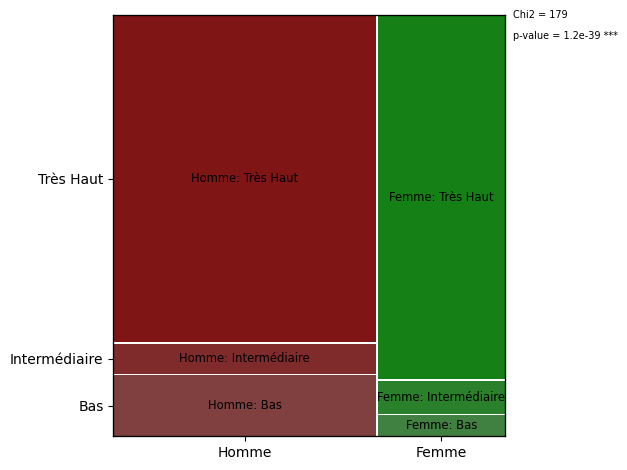

In [27]:
# Génération d'un mosaic plot
residual_palette = sns.color_palette("coolwarm", len(crosstab))
mosaic(crosstab.stack(),labelizer=lambda k: f"{k[0]}: {k[1]}")
chi2_value = 179
p_value = 1.2e-39
p_value_text = f"p-value = {p_value} ***"
plt.text(1.02, 1, f"Chi2 = {chi2_value}", ha='left', va='center', fontsize=7, transform=plt.gca().transAxes)
plt.text(1.02, 0.95, p_value_text, ha='left', va='center', fontsize=7, transform=plt.gca().transAxes)

# Affichage et sauvegarde de la figure
plt.tight_layout()
plt.savefig('mosaic_plot.png', dpi=300, bbox_inches='tight')

In [28]:
# Calcul du V de Cramer
table = crosstab.values
chi2, p_value, dof, expected = chi2_contingency(table)
n = np.sum(table)
cramer_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
cramer_v

0.14150902903141144

<span style="font-size:18px">MODELE LINERAIRE ET TESTS NON PARAMETRIQUES</span>

_Normalité_

In [29]:
# Vérification de la normalité des données par le test de Kolmogorov-Smirnov (plus adapté pour de grand échantillons)
nb_vid = mooc_final['nb_videos']

# Test de KS
stat, p_value = stats.kstest(nb_vid, 'norm')
stat,p_value

(0.5245427148440748, 0.0)

Homoscédasticité

In [30]:
# Vérification de l'homoscédasticité avec le test de Bartlett
mooc_finalgrouped = mooc_final.groupby('Gender')['nb_videos']

# Extraction des données pour chaque groupe
hommes = mooc_finalgrouped.get_group('un homme')
femmes = mooc_finalgrouped.get_group('une femme')

# Test de Bartlett
stat, p_value = stats.bartlett(hommes, femmes)
stat, p_value

(0.5848655333168188, 0.44441148177231393)

_Test de Student_

In [31]:
# Test de Student
t_statistic, p_value = stats.ttest_ind(hommes, femmes)
t_statistic, p_value 

(-3.7828059599346706, 0.00015606501583036533)

_Equivalent non paramétrique Mann-Whitney_

In [32]:
# Test bilatéral
u_statisticbi, p_valuebi = stats.mannwhitneyu(hommes, femmes, alternative='two-sided')
u_statisticbi, p_valuebi

(8711923.0, 0.00043347156469210563)

In [33]:
# Test unilatéral
u_statisticuni, p_valueuni = stats.mannwhitneyu(hommes, femmes, alternative='less')
u_statisticuni, p_valueuni

(8711923.0, 0.00021673578234605281)

In [34]:
# Nombre moyen de vidéos par genre
hmean=np.mean(hommes)
fmean=np.mean(femmes)
print(hmean)
print(fmean)

13.518269703424545
14.511705685618729


_Régression linéaire_

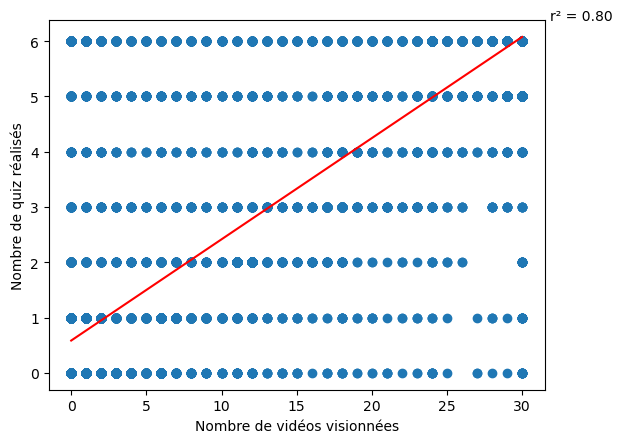

In [35]:
# Détermination des valeurs de x et y
x = mooc_final["nb_videos"]
y = mooc_final["nb_QuizzAssign"]

# Calcul de l'équation de la droite de régression
slope, intercept = np.polyfit(x, y, 1)
x_regression = np.linspace(min(x), max(x), 100)
y_regression = slope * x_regression + intercept

# Création du graphique
plt.scatter(x, y)
plt.plot(x_regression, y_regression, color='red')
plt.xlabel('Nombre de vidéos visionnées')
plt.ylabel('Nombre de quiz réalisés')

# Calcul du coefficient de corrélation (r)
correlation = np.corrcoef(mooc_final["nb_QuizzAssign"], mooc_final["nb_videos"])[0, 1]
r_squared = correlation**2

# Affichage de la valeur du coefficient de corrélation (r)
plt.text(1.01, 1, f"r² = {correlation:.2f}", transform=plt.gca().transAxes)
plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')

_Test de corrélation de Pearson et Spearman_

In [36]:
# Test de corrélation de Pearson
pearson_corr, pearson_p_value = pearsonr(mooc_final["nb_QuizzAssign"], mooc_final["nb_videos"])
print("Corrélation de Pearson :", pearson_corr)
print("P-value de Pearson :", pearson_p_value)

# Test de corrélation de Spearman
spearman_corr, spearman_p_value = spearmanr(mooc_final["nb_QuizzAssign"], mooc_final["nb_videos"])
print("Corrélation de Spearman :", spearman_corr)
print("P-value de Spearman :", spearman_p_value)

Corrélation de Pearson : 0.8041362662586713
P-value de Pearson : 0.0
Corrélation de Spearman : 0.7977523650020462
P-value de Spearman : 0.0


_Représentation graphique de la variable "Nb_videos" en fonction du genre et de l'HDI_

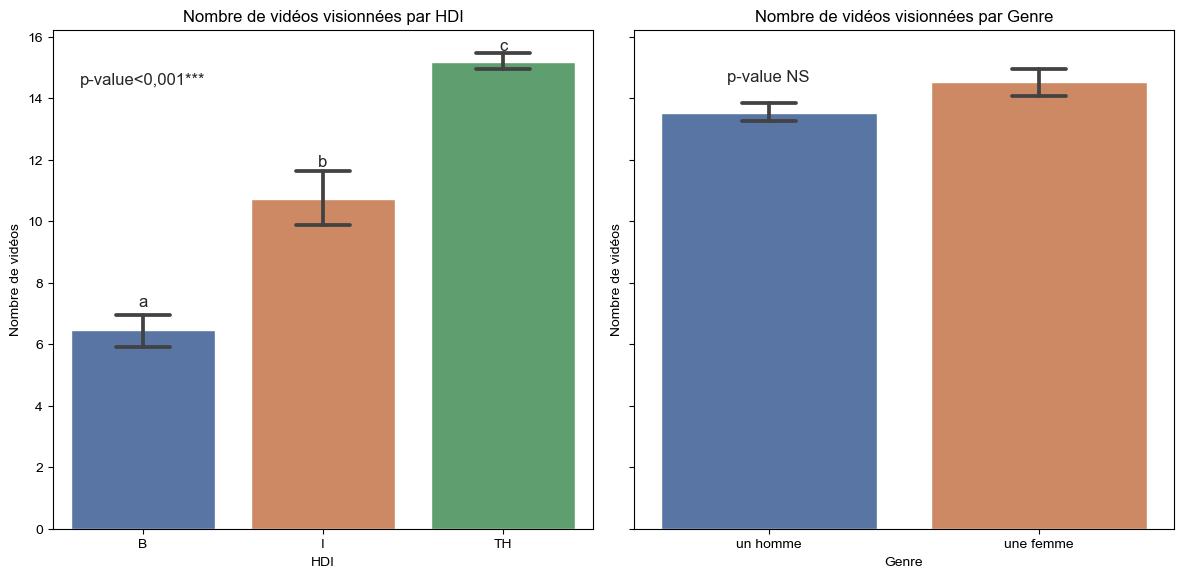

In [37]:
# Caractéristiques générales du graphique
fig, axes = plt.subplots(1, 2, figsize=(12, 6),sharey=True)
sns.set()
palette ='colorblind'

# Graphique 1 : Nombre de vidéos par HDI
sns.barplot(data=mooc_final, x="HDI", y="nb_videos", capsize=0.3, ax=axes[0], order=['B', 'I', 'TH'])

# Annotations
axes[0].annotate('a', xy=(0, mooc_final[mooc_final["HDI"] == "B"]["nb_videos"].values[0]), 
                 xytext=(0, 160),
                 textcoords="offset points", ha='center', fontsize=12)
axes[0].annotate('b', xy=(1, mooc_final[mooc_final["HDI"] == "I"]["nb_videos"].values[0]), 
                 xytext=(0, 150),
                 textcoords="offset points", ha='center', fontsize=12)
axes[0].annotate('c', xy=(2, mooc_final[mooc_final["HDI"] == "TH"]["nb_videos"].values[0]), 
                 xytext=(0, 322),
                 textcoords="offset points", ha='center', fontsize=12)
axes[0].annotate('p-value<0,001***', xy=(0, mooc_final[mooc_final["HDI"] == "B"]["nb_videos"].values[0]), 
                 xytext=(0, 320),
                 textcoords="offset points", ha='center', fontsize=12)

axes[0].set_xlabel("HDI")
axes[0].set_ylabel("Nombre de vidéos")
axes[0].set_title("Nombre de vidéos visionnées par HDI")

# Graphique 2 : Nombre de vidéos par Genre
sns.barplot(data=mooc_final, x="Gender", y="nb_videos", capsize=0.2, ax=axes[1],order=['un homme', 'une femme'])

#Annotations
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Nombre de vidéos")
axes[1].set_title("Nombre de vidéos visionnées par Genre")
axes[1].annotate('p-value NS', xy=(0, mooc_final[mooc_final["Gender"] == "une femme"]["nb_videos"].values[0]),
                 xytext=(0, 300),
                 textcoords="offset points", ha='center', fontsize=12)

# Enregistrement du graphique
plt.savefig('barplot ANOVA.png', dpi=300, bbox_inches='tight')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()

_ANOVA sans interaction_

In [38]:
# Création du modèle ANOVA
model = ols('nb_videos ~ Gender + HDI', data=mooc_final).fit()

# ANOVA
table = sm.stats.anova_lm(model, typ=2)
table['Mean Square'] = table['sum_sq'] / table['df']
table

,sum_sq,df,F,PR(>F),Mean Square
Gender,5.743061e+01,1.0,0.440913,5.066990e-01,57.430606
HDI,7.415641e+04,2.0,284.661456,1.403405e-120,37078.203676
Residual,1.165380e+06,8947.0,NaN,NaN,130.253685


_Réalisation du test de Tukey_

In [39]:
# Créer un nouveau DataFrame sans les données manquantes de la colonne HDI
hdi_clean = mooc_final.dropna(subset=['HDI']).copy()

# Effectuer le test de Tukey HSD sur les données propres
tukey = mc.pairwise_tukeyhsd(hdi_clean['nb_videos'], hdi_clean['HDI'])
tukey_summary = tukey.summary()
tukey_results = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
tukey_results['p-adj'] = tukey_results['p-adj'].apply(lambda x: '{:.2e}'.format(x))
tukey_results

,group1,group2,meandiff,p-adj,lower,upper,reject
0,B,I,4.2706,0.00e+00,2.9414,5.5997,True
1,B,TH,8.7373,0.00e+00,7.8473,9.6273,True
2,I,TH,4.4668,0.00e+00,3.3844,5.5492,True


In [40]:
# Table de statistiques inférentielles de l'ANOVA
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nb_videos   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     194.6
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          3.06e-122
Time:                        08:38:41   Log-Likelihood:                -34492.
No. Observations:                8951   AIC:                         6.899e+04
Df Residuals:                    8947   BIC:                         6.902e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.4327      0.358     17.991      0.000       5.732       7.134
Gender[T.une femme]     0.1725      0.260      0.664      0.507      -0.337       0.682
HDI[T.I]                4.2482      0.570      7.449      0.000       3.130       5.366
HDI[T.TH]               8.7085      0.384     22.688      0.000       7.956       9.461
==============================================================================
Omnibus:                    64231.085   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              835.545
Skew:                           0.182   Prob(JB):                    3.66e-182
Kurtosis:                       1.548   Cond. No.                         7.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_ANOVA avec effet d'interaction_

In [41]:
model2 = ols('nb_videos ~ Gender + HDI+ Gender*HDI', data=mooc_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nb_videos   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          1.35e-120
Time:                        08:38:41   Log-Likelihood:                -34491.
No. Observations:                8951   AIC:                         6.899e+04
Df Residuals:                    8945   BIC:                         6.904e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.3737      0.384     16.596      0.000       5.621       7.127
Gender[T.une femme]               0.5855      1.017      0.576      0.565      -1.407       2.578
HDI[T.I]                          4.8392      0.670      7.222      0.000       3.526       6.153
HDI[T.TH]                         8.7296      0.418     20.859      0.000       7.909       9.550
Gender[T.une femme]:HDI[T.I]     -1.9315      1.376     -1.403      0.161      -4.629       0.766
Gender[T.une femme]:HDI[T.TH]    -0.3053      1.055     -0.290      0.772      -2.373       1.762
==============================================================================
Omnibus:                    64400.643   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.435
Skew:                           0.181   Prob(JB):                    6.38e-182
Kurtosis:                       1.549   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="font-size:18px">REGRESSION LOGISTIQUE</span>

In [42]:
# Vérification de la colonne contenant la variable réponse
mooc_final['nb_ExamCertif'].unique()

array([0, 1, 2], dtype=int64)

In [43]:
# La Colonne nb_ExamCertif contient une valeur 2 car certains apprenants ont eu leur examen ET le certificat.
# Modification des 2 en 1
mooc_final['nb_ExamCertif'] = mooc_final['nb_ExamCertif'].replace(2, 1)
mooc_final['nb_ExamCertif'].unique()

array([0, 1], dtype=int64)

_Un point sur les données analysées_

In [44]:
# Obtention du certificat/examen en fonction de l'HDI
table_hdi = pd.crosstab(mooc_final['nb_ExamCertif'], mooc_final['HDI'])
table_hdi

HDI,B,I,TH
nb_ExamCertif,,,
0,883,559,5870
1,149,108,1394


In [45]:
# Obtention du certificat/examen en fonction du genre
table_gender = pd.crosstab(mooc_final['nb_ExamCertif'], mooc_final['Gender'])
table_gender

Gender,un homme,une femme
nb_ExamCertif,,
0,5030,2402
1,1073,588


In [46]:
# Régression logistique
model3 = smf.glm('nb_ExamCertif ~ Gender + HDI', data=mooc_final, 
                 family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          nb_ExamCertif   No. Observations:                 8951
Model:                            GLM   Df Residuals:                     8947
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4269.0
Date:                Fri, 07 Jul 2023   Deviance:                       8538.0
Time:                        08:38:42   Pearson chi2:                 8.95e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002283
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.7941      0.089    -20.151      0.000      -1.969      -1.620
Gender[T.une femme]     0.1148      0.058      1.984      0.047       0.001       0.228
HDI[T.I]                0.1124      0.138      0.814      0.416      -0.158       0.383
HDI[T.TH]               0.3166      0.094      3.358      0.001       0.132       0.501
=======================================================================================
"""

In [47]:
# Construction de la table d'odds ratios du modèle logistique
params = model3.params
conf = model3.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
conf=np.exp(conf)
conf['pvalues'] = model3.pvalues
conf

,Lower CI,Upper CI,OR,pvalues
Intercept,0.139657,0.197983,0.166282,2.617757e-90
Gender[T.une femme],1.001413,1.256224,1.121606,4.721344e-02
HDI[T.I],0.853683,1.466699,1.118971,4.155481e-01
HDI[T.TH],1.140860,1.650988,1.372423,7.860479e-04


_Transformation de la table d'odds ratios pour réaliser le Forest Plot associé_

In [48]:
conf2=conf[['OR','Lower CI','Upper CI']]
conf2= conf2.drop('Intercept',axis=0)
# Modification de plusieurs intitulés de lignes
conf2 = conf2.rename(index={'Gender[T.une femme]': 'Femme',
                            'HDI[T.I]': 'HDI Intermédiaire',
                           'HDI[T.TH]': 'HDI Très Haut'})
# Création d'un DataFrame pour la ligne à insérer avant la première ligne avec un nom d'index
new_row_before = pd.DataFrame([[1, 1, 1]], columns=['OR', 'Lower CI', 'Upper CI'], index=['Homme'])

# Création d'un DataFrame pour la ligne à insérer après la première ligne avec un nom d'index
new_row_after = pd.DataFrame([[1,1,1 ]], columns=['OR', 'Lower CI', 'Upper CI'], index=['HDI Bas'])

# Concaténation des DataFrames

conf2 =pd.concat([new_row_before, conf2.iloc[0:1], new_row_after,conf2.iloc[1:3]])
conf2

,OR,Lower CI,Upper CI
Homme,1.000000,1.000000,1.000000
Femme,1.121606,1.001413,1.256224
HDI Bas,1.000000,1.000000,1.000000
HDI Intermédiaire,1.118971,0.853683,1.466699
HDI Très Haut,1.372423,1.140860,1.650988


_Construction du Forest Plot_

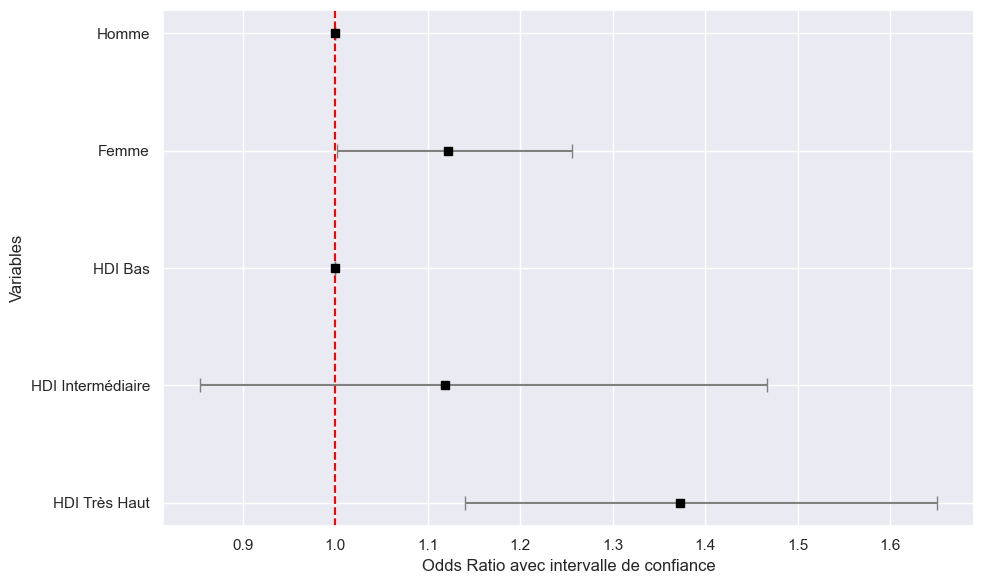

In [49]:
# Données à partir du tableau conf
labels = conf2.index[::-1]
or_values = conf2['OR'][::-1]
ci_lower = conf2['Lower CI'][::-1]
ci_upper = conf2['Upper CI'][::-1]

# Création du forest plot
plt.figure(figsize=(10, 6))
plt.errorbar(or_values, range(len(or_values)),
             xerr=[or_values - ci_lower, ci_upper - or_values],
             fmt='s', color='black', ecolor='gray', capsize=5)

# Ajout des étiquettes pour chaque variable
plt.yticks(range(len(labels)), labels)

# Ajout d'une ligne verticale à la valeur de référence (OR = 1)
plt.axvline(x=1, color='red', linestyle='--')

# Personnalisation des axes et du titre
plt.xlabel('Odds Ratio avec intervalle de confiance')
plt.ylabel('Variables')

# Sauvegarde du graphique
plt.savefig('forestplot.png', dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.tight_layout()
plt.show()

_Données de comptage et loi de Poisson_

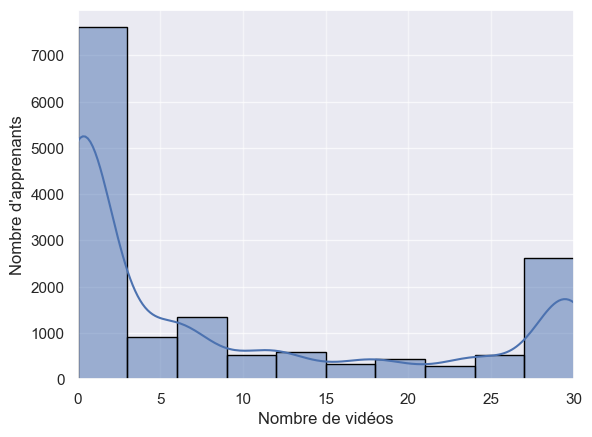

In [50]:
# Extraction de la colonne 'nb_videos' du DataFrame
nb_videos = mooc_final['nb_videos']

# Histogramme de la distribution
sns.histplot(nb_videos, bins=10, edgecolor='black',kde=True)
plt.xlim(0, 30)

# Etiquettes du graphique
plt.xlabel('Nombre de vidéos')
plt.ylabel("Nombre d'apprenants")

# Propriétés de quadrillage
plt.grid(visible=True, which='major', axis='x', alpha=0.5)
plt.grid(visible=True, which='major', axis='y',alpha=0.7)
plt.grid(visible=True, which='minor', axis='y',alpha=0.5)

# Sauvegarde de la figure
plt.savefig('histogramme.png', dpi=300, bbox_inches='tight')

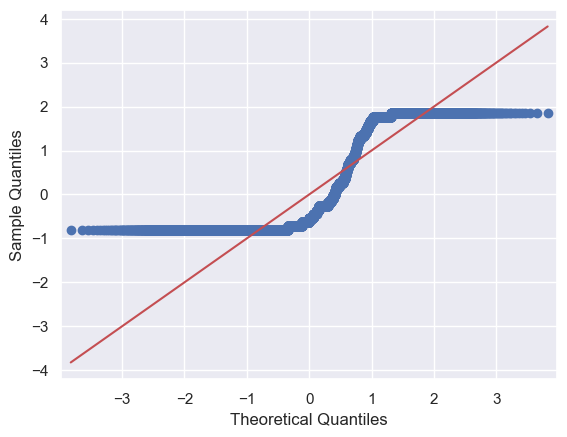

In [51]:
# QQ plot de la distribution de la variable "Nombre de vidéos"
sm.qqplot(nb_videos, line='s',fit=True)
plt.savefig('qqplot', dpi=300, bbox_inches='tight')

_Construction des graphiques diagnostics du modèle linéaire ANOVA_

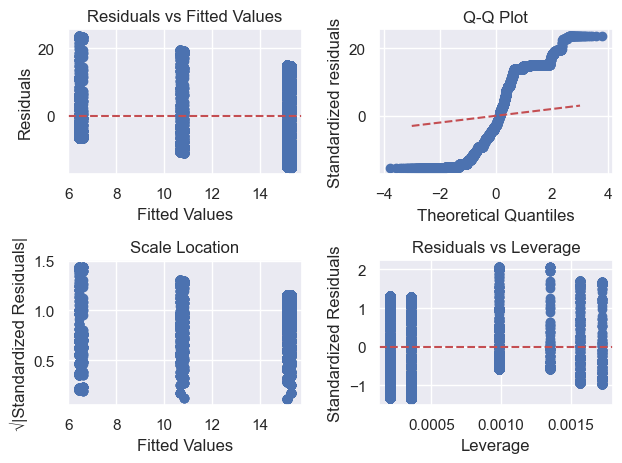

In [52]:
# Obtention des résidus et des valeurs ajustées
residuals = model.resid
fitted_values = model.fittedvalues

# Calcul des résidus standardisés
standardized_residuals = model.get_influence().resid_studentized_internal

# Calcul du levier et de la distance de Cook
leverage = model.get_influence().hat_matrix_diag
cooks_distance = model.get_influence().cooks_distance[0]

# Calcul du quantile théorique et quantile empirique
quantiles = stats.probplot(residuals, dist="norm")


# Plot residuals vs fitted values
plt.subplot(2, 2, 1)
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Plot Q-Q plot
plt.subplot(2, 2, 2)
plt.scatter(quantiles[0][0], quantiles[0][1])
plt.plot([-3, 3], [-3, 3], color='r', linestyle='--')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')
plt.title('Q-Q Plot')

# Plot scale location
plt.subplot(2, 2, 3)
plt.scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)))
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale Location')

# Plot residuals vs leverage with Cook's distance
plt.subplot(2, 2, 4)
plt.scatter(leverage, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')

# Affichage du graphique
plt.tight_layout()
plt.savefig('normalité de distribution.png', dpi=300, bbox_inches='tight')
plt.show()

_Régression logistique avec la variable réponse "nombre de vidéos visionnées" et les variables explicatives Genre et HDI_

In [53]:
# Régression logistique
model4=smf.glm('nb_videos ~ Gender + HDI + Gender*HDI', data=mooc_final, family=sm.families.Poisson()).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              nb_videos   No. Observations:                 8951
Model:                            GLM   Df Residuals:                     8945
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66609.
Date:                Fri, 07 Jul 2023   Deviance:                   1.0085e+05
Time:                        08:38:49   Pearson chi2:                 8.62e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5189
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.8522      0.013    138.951      0.000       1.826       1.878
Gender[T.une femme]               0.0879      0.034      2.586      0.010       0.021       0.154
HDI[T.I]                          0.5649      0.020     28.822      0.000       0.526       0.603
HDI[T.TH]                         0.8627      0.014     62.305      0.000       0.836       0.890
Gender[T.une femme]:HDI[T.I]     -0.2158      0.042     -5.090      0.000      -0.299      -0.133
Gender[T.une femme]:HDI[T.TH]    -0.0695      0.035     -2.011      0.044      -0.137      -0.002
=================================================================================================
"""